In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
from freq_pd import proc_freq

In [5]:
prod_clusters = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\product_clusters.csv',dtype={'Item_Number':str}, index_col=0)

In [6]:
pdtypes = {'Item Number':str,'Vendor':str}

In [7]:
# products_iowa = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\Iowa_Liquor_Products(1).csv',dtype=pdtypes)

In [8]:
# products_iowa.rename({'Item Description':'Item_Description'} ,axis=1, inplace=True)

In [9]:
# products_iowa.info()

In [10]:
# products_iowa.head()

In [11]:
# products_iowa.drop(columns=['UPC','SCC',])

In [12]:
# proc_freq(products_iowa,'Age') 96% have age zero

In [13]:
# item_trans_category = item_trans_category.merge(products, how='inner', on=['Item_Number','Category'])

In [14]:
# prod_clusters_iowa = prod_clusters.merge(products_iowa, how='inner',on=['Item Description'])

In [15]:
prod_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 1 to 4474
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4304 non-null   object 
 1   Item_Description    4304 non-null   object 
 2   Bottle_Volume       4304 non-null   int64  
 3   Bottle_Retail       4304 non-null   float64
 4   Bottles_Sold        4304 non-null   int64  
 5   cluster_name        4304 non-null   object 
 6   revenue             4304 non-null   float64
 7   Num_Stores_Selling  4304 non-null   int64  
 8   New_Category_Name   4304 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 336.2+ KB


In [16]:
prod_clusters.describe()

,Bottle_Volume,Bottle_Retail,Bottles_Sold,revenue,Num_Stores_Selling
count,4304.000000,4304.000000,4304.000000,4.304000e+03,4304.000000
mean,817.151022,28.607939,6599.188197,9.553405e+04,122.778113
std,379.863360,32.255328,24778.767211,3.926987e+05,209.079123
min,20.000000,0.990000,1.000000,7.500000e+00,1.000000
25%,750.000000,11.389293,55.000000,1.428465e+03,3.000000
50%,750.000000,20.185164,575.000000,1.325902e+04,49.000000
75%,750.000000,34.140774,3729.500000,5.347715e+04,152.000000
max,2400.000000,495.750000,563260.000000,1.062280e+07,1725.000000


In [17]:

everything_else = prod_clusters.loc[prod_clusters['cluster_name']=='Everything_Else',:]

In [18]:
everything_else.head(10)

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,cluster_name,revenue,Num_Stores_Selling,New_Category_Name
1,10006,Scoresby Rare Scotch,750,7.70,4619,Everything_Else,35566.30,197,Scotch
2,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,Everything_Else,42006.72,136,Temporary & Specialty Packages
4,10009,Scoresby Rare Scotch,1000,10.11,1722,Everything_Else,17409.42,70,Scotch
5,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,Everything_Else,25082.34,120,Temporary & Specialty Packages
6,100202,Baileys Original Irish Cream w/2 Dessert Bowls,750,24.74,3160,Everything_Else,78178.40,149,Temporary & Specialty Packages
7,100210,Clyde Mays Dualpack,750,30.00,66,Everything_Else,1980.00,1,Temporary & Specialty Packages
8,100215,Tequila Rose Liqueur w/2 Shot Glasses,750,17.25,1191,Everything_Else,20544.75,161,Temporary & Specialty Packages
9,100216,Tarantula Azul Holiday w/2 Shot Glasses,750,13.49,133,Everything_Else,1794.17,24,Temporary & Specialty Packages
10,100248,Martell Blue Swift w/ 2 Glasses,750,31.47,47,Everything_Else,1479.09,8,Temporary & Specialty Packages
11,100280,The Bitter Truth Cocktail Bar Pack,20,14.25,180,Everything_Else,2565.00,38,Cocktails


In [19]:
scaler = StandardScaler()

In [20]:
everything_else[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]] = scaler.fit_transform\
                                           (everything_else[['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']])
                                                   

everything_else[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled']].describe()

C:\Users\dgarb\AppData\Local\Temp/ipykernel_232/2946690976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]] = scaler.fit_transform\
C:\Users\dgarb\AppData\Local\Temp/ipykernel_232/2946690976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]] = scaler.fit_transform\
C:\Users\dgarb\AppData\Local\Temp/ipykernel_232/2946690976.py:

,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled
count,3.651000e+03,3.651000e+03,3.651000e+03
mean,4.440284e-16,5.136036e-16,-7.312997e-16
std,1.000137e+00,1.000137e+00,1.000137e+00
min,-3.248683e+00,-1.361810e+00,-3.929446e-01
25%,2.151304e-01,-7.617697e-01,-3.883847e-01
50%,2.151304e-01,-2.597378e-01,-3.464515e-01
75%,2.151304e-01,4.979734e-01,-9.306393e-02
max,2.350358e+00,3.668852e+00,8.325679e+00


determine optimal number of clusters

In [21]:
from sklearn.metrics import silhouette_score

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]

df_scaled = everything_else[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.5753314073274531
number of clusters =  3   silhouette score =  0.5738019793962222
number of clusters =  4   silhouette score =  0.5127222521695394
number of clusters =  5   silhouette score =  0.42088976593822036
number of clusters =  6   silhouette score =  0.44630719576083355
number of clusters =  7   silhouette score =  0.48800770163811
number of clusters =  8   silhouette score =  0.4931659382631954
number of clusters =  9   silhouette score =  0.4628871540550925
number of clusters =  10   silhouette score =  0.4633959187905847


In [22]:
# inertia_scores = []

# for clust in range(2,11):
#     inertia = KMeans(n_clusters=clust, random_state=42)\
#               .fit(df_scaled).inertia_
#     inertia_scores.append(inertia)

In [23]:
# plt.plot(range(2,11), inertia_scores)
# plt.title("Inertia vs. number of clusters")
# plt.xlabel("Number of clusters: K")
# plt.ylabel('Inertia')
# plt.show()

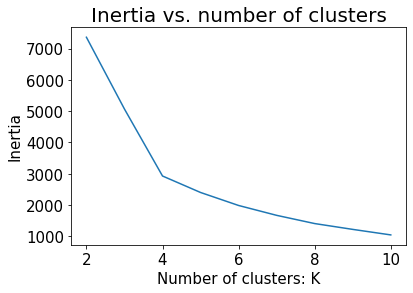

In [24]:


inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

plt.rcParams.update({'font.size': 15})
plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters",fontsize = 20)
plt.xlabel("Number of clusters: K",fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.show()


In [25]:
# stop

get three sub-clusters from everything_else

In [26]:
cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


model = KMeans(n_clusters=4, random_state=42)

model.fit(everything_else[cluster_cols])

everything_else['sub_cluster'] = model.predict(everything_else[cluster_cols])

C:\Users\dgarb\AppData\Local\Temp/ipykernel_232/3938904934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['sub_cluster'] = model.predict(everything_else[cluster_cols])


In [27]:
everything_else.head()

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,cluster_name,revenue,Num_Stores_Selling,New_Category_Name,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,sub_cluster
1,10006,Scoresby Rare Scotch,750,7.70,4619,Everything_Else,35566.30,197,Scotch,0.215130,-0.967835,0.019950,0
2,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,Everything_Else,42006.72,136,Temporary & Specialty Packages,0.215130,-0.499293,-0.153505,0
4,10009,Scoresby Rare Scotch,1000,10.11,1722,Everything_Else,17409.42,70,Scotch,1.401368,-0.826333,-0.239070,0
5,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,Everything_Else,25082.34,120,Temporary & Specialty Packages,0.215130,1.010258,-0.338852,3
6,100202,Baileys Original Irish Cream w/2 Dessert Bowls,750,24.74,3160,Everything_Else,78178.40,149,Temporary & Specialty Packages,0.215130,0.032661,-0.110499,0


In [28]:
everything_else['Bottle_Volume_liters'] = everything_else['Bottle_Volume']/1000

C:\Users\dgarb\AppData\Local\Temp/ipykernel_232/2100188245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['Bottle_Volume_liters'] = everything_else['Bottle_Volume']/1000


# create price per milliliter

In [29]:
# price/volume
everything_else['price_per_ml'] = everything_else['Bottle_Retail'] / everything_else['Bottle_Volume']

C:\Users\dgarb\AppData\Local\Temp/ipykernel_232/1856010719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['price_per_ml'] = everything_else['Bottle_Retail'] / everything_else['Bottle_Volume']


In [30]:
everything_else.groupby(['sub_cluster']).agg({'Bottle_Volume_liters' : 'mean', 'Bottle_Retail':'mean','Bottles_Sold':'mean' })

,Bottle_Volume_liters,Bottle_Retail,Bottles_Sold
sub_cluster,,,
0,0.785045,17.943764,2843.421364
1,0.210961,8.983089,4851.725400
2,0.661213,12.766997,52484.845588
3,0.755698,49.153333,610.076310


In [31]:
everything_else.groupby(['sub_cluster']).agg({'Bottle_Volume' :['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

Bottle_Volume                                      Bottle_Retail  \
                      min   max         std median        mean           min   
sub_cluster                                                                    
0                     750  1000   86.248674  750.0  785.045455          3.20   
1                      20   400  142.691175  200.0  210.961098          0.99   
2                      50  1000  293.112604  750.0  661.213235          1.43   
3                     375  1200   48.399127  750.0  755.698178         33.24   

                                                    Bottles_Sold         \
                  max        std  median       mean          min    max   
sub_cluster                                                               
0            37.13645   7.737670  17.245  17.943764            1  29833   
1            37.50000   6.128577   7.500   8.983089            2  37385   
2            37.47000   8.486749  11.250  12.766997        28404  97514   
3            86.67000  13.057423  45.000  49.153333            1  26065   

                                                  
                      std   median          mean  
sub_cluster                                       
0             4702.926358    775.5   2843.421364  
1             6819.117730   2162.0   4851.725400  
2            19746.505651  47580.5  52484.845588  
3             1747.022821     78.5    610.076310

In [32]:
from freq_pd import proc_freq

In [33]:
proc_freq(everything_else,'sub_cluster')

,sub_cluster,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,0,2200,60.26,2200,60.26
1,1,437,11.97,2637,72.23
2,2,136,3.73,2773,75.95
3,3,878,24.05,3651,100.00


In [34]:
everything_else['str_volume'] = str(everything_else.Bottle_Volume)

C:\Users\dgarb\AppData\Local\Temp/ipykernel_232/1745242950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['str_volume'] = str(everything_else.Bottle_Volume)


In [35]:
df = everything_else.groupby(['sub_cluster']).agg({'revenue':'sum'})
df.style.format("{:.0f}")


,revenue
sub_cluster,
0,93721889
1,14863536
2,89864386
3,23972997


In [36]:
everything_else.groupby(['sub_cluster']).agg({'Bottle_Volume':'nunique'})

,Bottle_Volume
sub_cluster,
0,6
1,8
2,6
3,8


In [37]:


everything_else.groupby(['sub_cluster']).agg({'Item_Number':['nunique'],'revenue':['sum'],'Bottle_Volume':['nunique','min','max','std', 'median', 'mean'],'Bottle_Retail':['min','max','std', 'median', 'mean'], 'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['sum','min','max','std', 'median', 'mean'] })

Item_Number      revenue Bottle_Volume                         \
                nunique          sum       nunique  min   max         std   
sub_cluster                                                                 
0                  2200  93721888.64             6  750  1000   86.248674   
1                   437  14863536.11             8   20   400  142.691175   
2                   136  89864385.55             6   50  1000  293.112604   
3                   877  23972997.01             8  375  1200   48.399127   

                               Bottle_Retail            ... price_per_ml  \
            median        mean           min       max  ...          max   
sub_cluster                                             ...                
0            750.0  785.045455          3.20  37.13645  ...     0.045507   
1            200.0  210.961098          0.99  37.50000  ...     0.712500   
2            750.0  661.213235          1.43  37.47000  ...     0.144000   
3            750.0  755.698178         33.24  86.67000  ...     0.226896   

                                         Bottles_Sold                \
                  std   median      mean          sum    min    max   
sub_cluster                                                           
0            0.010435  0.02200  0.023254      6255527      1  29833   
1            0.072077  0.03750  0.075992      2120204      2  37385   
2            0.018753  0.01806  0.022293      7137939  28404  97514   
3            0.018750  0.06000  0.065398       535647      1  26065   

                                                  
                      std   median          mean  
sub_cluster                                       
0             4702.926358    775.5   2843.421364  
1             6819.117730   2162.0   4851.725400  
2            19746.505651  47580.5  52484.845588  
3             1747.022821     78.5    610.076310  

[4 rows x 24 columns]

In [38]:
everything_else.groupby(['sub_cluster']).agg({'Num_Stores_Selling':['min','max','std', 'median', 'mean']})

Num_Stores_Selling                                     
                           min   max         std median        mean
sub_cluster                                                        
0                            1   932  125.452913   50.0   97.159545
1                            1  1069  167.786271   97.0  145.322654
2                           25  1551  392.496251  518.5  649.764706
3                            1   660   76.920792    6.0   46.389522

In [39]:
pd.set_option('display.max_columns', None)
everything_else.groupby(['sub_cluster']).agg({'Item_Number':['nunique'],'revenue':['sum'],'Bottle_Volume':['nunique','min','max','std','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['sum','min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

Item_Number      revenue Bottle_Volume                         \
                nunique          sum       nunique  min   max         std   
sub_cluster                                                                 
0                  2200  93721888.64             6  750  1000   86.248674   
1                   437  14863536.11             8   20   400  142.691175   
2                   136  89864385.55             6   50  1000  293.112604   
3                   877  23972997.01             8  375  1200   48.399127   

                   price_per_ml                                         \
            median          min       max       std   median      mean   
sub_cluster                                                              
0            750.0      0.00320  0.045507  0.010435  0.02200  0.023254   
1            200.0      0.00688  0.712500  0.072077  0.03750  0.075992   
2            750.0      0.00350  0.144000  0.018753  0.01806  0.022293   
3            750.0      0.03575  0.226896  0.018750  0.06000  0.065398   

            Bottles_Sold                                                     \
                     sum    min    max           std   median          mean   
sub_cluster                                                                   
0                6255527      1  29833   4702.926358    775.5   2843.421364   
1                2120204      2  37385   6819.117730   2162.0   4851.725400   
2                7137939  28404  97514  19746.505651  47580.5  52484.845588   
3                 535647      1  26065   1747.022821     78.5    610.076310   

            Num_Stores_Selling                                       
                           min   max         std median        mean  
sub_cluster                                                          
0                            1   932  125.452913   50.0   97.159545  
1                            1  1069  167.786271   97.0  145.322654  
2                           25  1551  392.496251  518.5  649.764706  
3                            1   660   76.920792    6.0   46.389522

In [40]:
everything_else['str_volume'] = [str(prod) for prod in everything_else.Bottle_Volume ]
# [str(prod) for prod in everything_else.Bottle_Volume ]

C:\Users\dgarb\AppData\Local\Temp/ipykernel_232/3195886119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['str_volume'] = [str(prod) for prod in everything_else.Bottle_Volume ]


In [41]:
# stop


# Name sub-clusters

In [42]:
sub_clust_dict ={0:'Most_Variety', 1:'Quick_Shots', 2:'Cheap', 3:'Moderately_High'}
# {0:'Most_Variety', 1:'Quick_Shots', 2:'Cheap', 3:'Moderately_High'}

everything_else['sub_cluster'].map(sub_clust_dict)


1          Most_Variety
2          Most_Variety
4          Most_Variety
5       Moderately_High
6          Most_Variety
             ...       
4470    Moderately_High
4471    Moderately_High
4472    Moderately_High
4473    Moderately_High
4474        Quick_Shots
Name: sub_cluster, Length: 3651, dtype: object

In [43]:
everything_else['sub_cluster_name'] = everything_else['sub_cluster'].map(sub_clust_dict)

C:\Users\dgarb\AppData\Local\Temp/ipykernel_232/3136741811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['sub_cluster_name'] = everything_else['sub_cluster'].map(sub_clust_dict)


In [44]:
# df_categ = everything_else.groupby(['sub_cluster','New_Category_Name']).agg({'price_per_ml':['min','max','std', 'median', 'mean']}).reset_index()

In [45]:
pd.set_option('display.max_columns', None)
everything_else.groupby(['sub_cluster_name']).agg({'Item_Number':['nunique'],'revenue':['sum'],'Bottle_Volume':['nunique','min','max','std', 'median', 'mean'],'Bottle_Retail':['min','max','std', 'median', 'mean'], 'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['sum','min','max','std', 'median', 'mean'] })

Item_Number      revenue Bottle_Volume             \
                     nunique          sum       nunique  min   max   
sub_cluster_name                                                     
Cheap                    136  89864385.55             6   50  1000   
Moderately_High          877  23972997.01             8  375  1200   
Most_Variety            2200  93721888.64             6  750  1000   
Quick_Shots              437  14863536.11             8   20   400   

                                                Bottle_Retail            \
                         std median        mean           min       max   
sub_cluster_name                                                          
Cheap             293.112604  750.0  661.213235          1.43  37.47000   
Moderately_High    48.399127  750.0  755.698178         33.24  86.67000   
Most_Variety       86.248674  750.0  785.045455          3.20  37.13645   
Quick_Shots       142.691175  200.0  210.961098          0.99  37.50000   

                                               price_per_ml            \
                        std  median       mean          min       max   
sub_cluster_name                                                        
Cheap              8.486749  11.250  12.766997      0.00350  0.144000   
Moderately_High   13.057423  45.000  49.153333      0.03575  0.226896   
Most_Variety       7.737670  17.245  17.943764      0.00320  0.045507   
Quick_Shots        6.128577   7.500   8.983089      0.00688  0.712500   

                                              Bottles_Sold                \
                       std   median      mean          sum    min    max   
sub_cluster_name                                                           
Cheap             0.018753  0.01806  0.022293      7137939  28404  97514   
Moderately_High   0.018750  0.06000  0.065398       535647      1  26065   
Most_Variety      0.010435  0.02200  0.023254      6255527      1  29833   
Quick_Shots       0.072077  0.03750  0.075992      2120204      2  37385   

                                                       
                           std   median          mean  
sub_cluster_name                                       
Cheap             19746.505651  47580.5  52484.845588  
Moderately_High    1747.022821     78.5    610.076310  
Most_Variety       4702.926358    775.5   2843.421364  
Quick_Shots        6819.117730   2162.0   4851.725400

In [89]:
def box3(feature,ylabel,order=None,ylim=None,title=None):

#     sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.1)
    sns.set(rc = {'figure.figsize':(15,8)})
    box2 = sns.boxplot(x='sub_cluster_name', y=feature, data=everything_else,palette='Blues',order=order)

    box2.set_xlabel('Sub-Cluster',fontsize=15)
    box2.set_ylabel(ylabel,fontsize=15)
    if ylim:
        box.set(ylim=ylim)
    if title:
        box.axes.set_title(title,fontsize=20) 


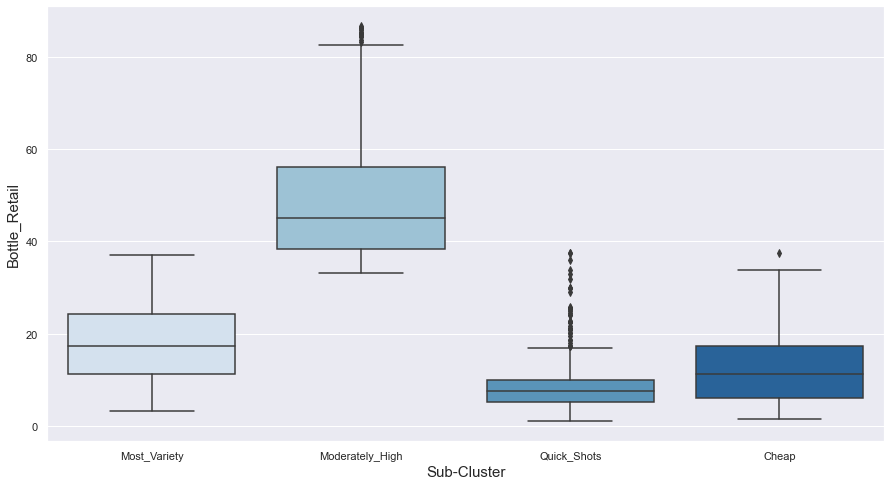

In [90]:
box3('Bottle_Retail','Bottle_Retail')

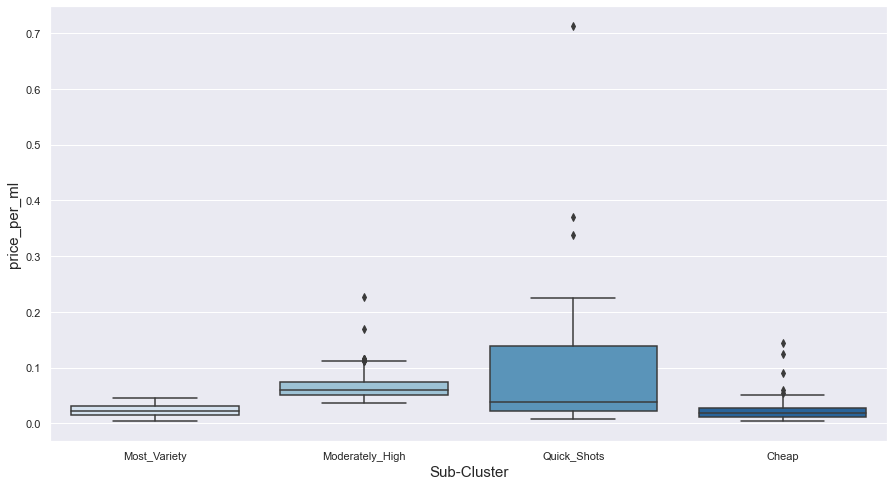

In [91]:
box3('price_per_ml','price_per_ml')

In [99]:
df_item = everything_else.groupby(['sub_cluster_name'])[['Item_Number']].nunique().reset_index()

In [103]:
# sns.set(font_scale=1.5)
# sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
# sns.set_color_codes("pastel")
# bar = sns.barplot(x="revenue", y="sub_cluster_name", data=everything_else.sort_values(by='revenue', ascending=False),
#             label="Total", color="b")

# # bar.set(xlim=(0,100),ylabel='Store Type',xlabel='Percent of Cluster')
# bar.set_xlabel('Revenue',fontsize=15)
# # bar.set_ylabel('Initial Product Clusters',fontsize=15)
# bar.set_ylabel('',fontsize=15)   
# # bar.set(xlim=(0,100))
# bar.set(title='Sub-Clusters: Total Reveneu')


[Text(0.5, 1.0, 'Sub-Clusters: Number of Unique Products')]

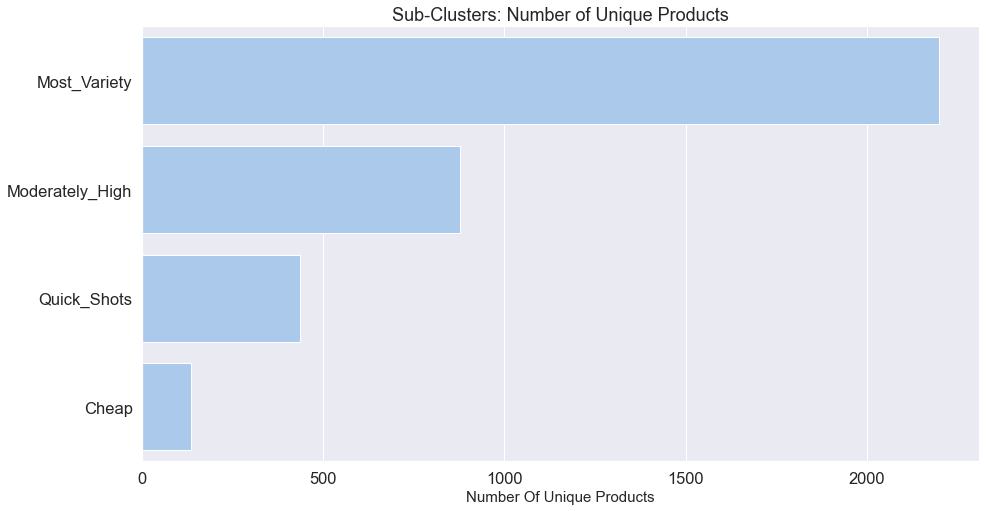

In [101]:
sns.set(font_scale=1.5)
sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
sns.set_color_codes("pastel")
bar = sns.barplot(x="Item_Number", y="sub_cluster_name", data=df_item.sort_values(by='Item_Number', ascending=False),
            label="Total", color="b")

# bar.set(xlim=(0,100),ylabel='Store Type',xlabel='Percent of Cluster')
bar.set_xlabel('Number Of Unique Products',fontsize=15)
# bar.set_ylabel('Initial Product Clusters',fontsize=15)
bar.set_ylabel('',fontsize=15)   
# bar.set(xlim=(0,100))
bar.set(title='Sub-Clusters: Number of Unique Products')


In [95]:
# box3('revenue','revenue')

In [94]:
# box3('Bottles_Sold','Bottles_Sold')

In [46]:
Moderately_High = everything_else.loc[everything_else['sub_cluster_name']== 'Moderately_High',['Item_Number', 'Item_Description','revenue','Bottle_Retail','Bottle_Volume','Bottles_Sold']]

In [47]:
Moderately_High

,Item_Number,Item_Description,revenue,Bottle_Retail,Bottle_Volume,Bottles_Sold
5,100148,Jack Daniels Single Barrel w/Snifter Glass,25082.34,41.39,750,606
12,100306,Patron Extra Anejo,30451.68,70.49,750,432
21,100600,Woodford Reserve w/Mint Julep Cup,19029.36,33.74,750,564
25,100618,Crystal Head Vodka w/4 Skull Glasses,5998.40,37.49,750,160
26,100619,Dewars 15YR w/2 Rock Glasses,420.75,38.25,750,11
...,...,...,...,...,...,...
4469,999930,Methanol Moonshine Christmas 2021,6048.00,36.00,750,168
4470,999931,Amrut Bagheeera Single Malt Whisky,450.00,75.00,750,6
4471,999932,Single Malts of India Neidhal,460.44,76.74,750,6
4472,999991,Legs Diamond Bourbon,270.00,45.00,750,6


In [48]:
mask1 = Moderately_High.Bottle_Volume < 750
Moderately_High[mask1]

,Item_Number,Item_Description,revenue,Bottle_Retail,Bottle_Volume,Bottles_Sold
44,100855,Makers Mark Generations Tri-Pack,46410.00,63.750000,375,728
145,101564,Ardbeg 10YO Monsters of Smoke VAP,14058.75,37.490000,600,375
153,101653,Koval Gin Trio Gift Pack,4803.63,42.510000,600,113
154,101654,Koval Whiskey Gift Pack,5850.00,48.750000,600,120
1623,48123,Hennessy XO,35718.17,85.086154,375,433
2968,902497,Remy Martin VSOP Mini,8907.84,38.610000,603,229
4473,999992,Kings County Distillery Aged Gift Set,405.00,67.500000,600,6


In [49]:
Moderately_High[mask1].shape

(7, 6)

In [50]:
mask2 = Moderately_High.Bottle_Volume > 750
# Moderately_High[mask2]

In [51]:
sub_clust_dict ={0:'Most_Variety', 1:'Quick_Shots', 2:'Cheap', 3:'Moderately_High'}

In [52]:
sub_most_variety = everything_else.loc[everything_else.sub_cluster_name== 'Most_Variety']
proc_freq(sub_most_variety,'str_volume')
sub_most_variety.str_volume.value_counts()

750     1881
1000     302
800        7
850        6
900        3
950        1
Name: str_volume, dtype: int64

In [53]:
 everything_else.loc[everything_else.sub_cluster_name== 'Most_Variety']['New_Category_Name'].value_counts(normalize=True)

Vodkas                                  0.170909
Whiskies                                0.122273
Liquers                                 0.115909
Rum                                     0.098182
Temporary & Specialty Packages          0.068636
Special Order Items                     0.067273
Bourbon                                 0.060455
Tequila                                 0.056364
Gin                                     0.052273
Brandies                                0.041364
Schnapps                                0.040000
Scotch                                  0.024091
American Distilled Spirits Specialty    0.020000
Imported Distilled Spirits Specialty    0.013636
Whiskey Liqueur                         0.011818
Neutral Grain Spirits Flavored          0.011364
Cocktails                               0.010909
Mezcal                                  0.007273
Neutral Grain Spirits                   0.004091
Triple Sec                              0.003182
Name: New_Category_N

In [54]:
sub_moderately_high = everything_else.loc[everything_else.sub_cluster_name =='Moderately_High']
proc_freq(sub_moderately_high,'str_volume')
sub_moderately_high.str_volume.value_counts(normalize=True)

750     0.962415
1000    0.026196
600     0.004556
375     0.002278
950     0.001139
850     0.001139
1200    0.001139
603     0.001139
Name: str_volume, dtype: float64

In [55]:
everything_else.loc[everything_else.sub_cluster_name =='Moderately_High']['New_Category_Name'].value_counts(normalize=True)

Bourbon                                 0.182232
Whiskies                                0.175399
Scotch                                  0.141230
Tequila                                 0.126424
Temporary & Specialty Packages          0.097950
Special Order Items                     0.067198
Rum                                     0.038724
Brandies                                0.036446
Mezcal                                  0.031891
Imported Distilled Spirits Specialty    0.029613
Gin                                     0.019362
Liquers                                 0.019362
American Distilled Spirits Specialty    0.014806
Vodkas                                  0.012528
Whiskey Liqueur                         0.003417
Cocktails                               0.002278
Distilled Spirits Specialty             0.001139
Name: New_Category_Name, dtype: float64

In [56]:
sub_quick_shots = everything_else.loc[everything_else.sub_cluster_name=='Quick_Shots']
proc_freq(sub_quick_shots,'str_volume')
sub_quick_shots.str_volume.value_counts(normalize=True)

375    0.391304
50     0.334096
200    0.194508
100    0.068650
20     0.004577
150    0.002288
400    0.002288
175    0.002288
Name: str_volume, dtype: float64

In [57]:
everything_else.loc[everything_else.sub_cluster_name=='Quick_Shots']['New_Category_Name'].value_counts(normalize=True)

Vodkas                                  0.201373
Whiskies                                0.157895
Cocktails                               0.118993
Liquers                                 0.116705
Temporary & Specialty Packages          0.070938
Bourbon                                 0.068650
Schnapps                                0.059497
Brandies                                0.054920
Tequila                                 0.041190
Rum                                     0.032037
Gin                                     0.020595
Imported Distilled Spirits Specialty    0.018307
Whiskey Liqueur                         0.013730
Scotch                                  0.009153
Special Order Items                     0.009153
American Distilled Spirits Specialty    0.004577
Neutral Grain Spirits                   0.002288
Name: New_Category_Name, dtype: float64

In [58]:
sub_cheap = everything_else.loc[everything_else.sub_cluster_name== 'Cheap']
proc_freq(sub_cheap,'str_volume')
sub_cheap.str_volume.value_counts(normalize=True)

750     0.404412
1000    0.264706
375     0.183824
200     0.102941
100     0.029412
50      0.014706
Name: str_volume, dtype: float64

In [59]:
everything_else.loc[everything_else.sub_cluster_name== 'Cheap']['New_Category_Name'].value_counts(normalize=True)

Vodkas                                  0.250000
Whiskies                                0.161765
Bourbon                                 0.102941
Rum                                     0.095588
Brandies                                0.080882
Tequila                                 0.080882
Liquers                                 0.073529
Gin                                     0.036765
Schnapps                                0.036765
Whiskey Liqueur                         0.029412
Triple Sec                              0.022059
Temporary & Specialty Packages          0.007353
Neutral Grain Spirits                   0.007353
Imported Distilled Spirits Specialty    0.007353
Neutral Grain Spirits Flavored          0.007353
Name: New_Category_Name, dtype: float64

In [60]:
everything_else.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3651 entries, 1 to 4474
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Number           3651 non-null   object 
 1   Item_Description      3651 non-null   object 
 2   Bottle_Volume         3651 non-null   int64  
 3   Bottle_Retail         3651 non-null   float64
 4   Bottles_Sold          3651 non-null   int64  
 5   cluster_name          3651 non-null   object 
 6   revenue               3651 non-null   float64
 7   Num_Stores_Selling    3651 non-null   int64  
 8   New_Category_Name     3651 non-null   object 
 9   Bottle_Volume_scaled  3651 non-null   float64
 10  Bottle_Retail_scaled  3651 non-null   float64
 11  Bottles_Sold_scaled   3651 non-null   float64
 12  sub_cluster           3651 non-null   int32  
 13  Bottle_Volume_liters  3651 non-null   float64
 14  price_per_ml          3651 non-null   float64
 15  str_volume           

In [61]:
everything_else2 = everything_else.copy()

In [62]:
everything_else2.head()

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,cluster_name,revenue,Num_Stores_Selling,New_Category_Name,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,sub_cluster,Bottle_Volume_liters,price_per_ml,str_volume,sub_cluster_name
1,10006,Scoresby Rare Scotch,750,7.70,4619,Everything_Else,35566.30,197,Scotch,0.215130,-0.967835,0.019950,0,0.75,0.010267,750,Most_Variety
2,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,Everything_Else,42006.72,136,Temporary & Specialty Packages,0.215130,-0.499293,-0.153505,0,0.75,0.020907,750,Most_Variety
4,10009,Scoresby Rare Scotch,1000,10.11,1722,Everything_Else,17409.42,70,Scotch,1.401368,-0.826333,-0.239070,0,1.00,0.010110,1000,Most_Variety
5,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,Everything_Else,25082.34,120,Temporary & Specialty Packages,0.215130,1.010258,-0.338852,3,0.75,0.055187,750,Moderately_High
6,100202,Baileys Original Irish Cream w/2 Dessert Bowls,750,24.74,3160,Everything_Else,78178.40,149,Temporary & Specialty Packages,0.215130,0.032661,-0.110499,0,0.75,0.032987,750,Most_Variety


In [63]:
sub_clust_dict ={0:'Most_Variety', 1:'Quick_Shots', 2:'Cheap', 3:'Moderately_High'}
everything_else2['cluster_name'] = everything_else2[['sub_cluster']].apply(lambda current_row: sub_clust_dict[current_row[0]],axis=1)

In [64]:
everything_else2['cluster_name'].head()

1       Most_Variety
2       Most_Variety
4       Most_Variety
5    Moderately_High
6       Most_Variety
Name: cluster_name, dtype: object

In [65]:
keeps = ['Item_Number','Item_Description','Bottle_Volume','Bottle_Retail', 'Bottles_Sold', 'cluster_name',
         'revenue', 'Num_Stores_Selling', 'New_Category_Name']


everything_else_keep = everything_else2[keeps]
everything_else_keep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3651 entries, 1 to 4474
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         3651 non-null   object 
 1   Item_Description    3651 non-null   object 
 2   Bottle_Volume       3651 non-null   int64  
 3   Bottle_Retail       3651 non-null   float64
 4   Bottles_Sold        3651 non-null   int64  
 5   cluster_name        3651 non-null   object 
 6   revenue             3651 non-null   float64
 7   Num_Stores_Selling  3651 non-null   int64  
 8   New_Category_Name   3651 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 285.2+ KB


In [66]:
prod_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 1 to 4474
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4304 non-null   object 
 1   Item_Description    4304 non-null   object 
 2   Bottle_Volume       4304 non-null   int64  
 3   Bottle_Retail       4304 non-null   float64
 4   Bottles_Sold        4304 non-null   int64  
 5   cluster_name        4304 non-null   object 
 6   revenue             4304 non-null   float64
 7   Num_Stores_Selling  4304 non-null   int64  
 8   New_Category_Name   4304 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 336.2+ KB


In [67]:
other_original_clusters = prod_clusters.loc[prod_clusters['cluster_name'] != 'Everything_Else',:]

In [68]:
everything_else_keep.shape

(3651, 9)

In [69]:
other_original_clusters.shape

(653, 9)

In [70]:
prod_clusters.shape

(4304, 9)

In [71]:
3651 + 653

4304

In [72]:
final_clusters = pd.concat([everything_else_keep,other_original_clusters], axis=0)

In [73]:
final_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 1 to 4457
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4304 non-null   object 
 1   Item_Description    4304 non-null   object 
 2   Bottle_Volume       4304 non-null   int64  
 3   Bottle_Retail       4304 non-null   float64
 4   Bottles_Sold        4304 non-null   int64  
 5   cluster_name        4304 non-null   object 
 6   revenue             4304 non-null   float64
 7   Num_Stores_Selling  4304 non-null   int64  
 8   New_Category_Name   4304 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 336.2+ KB


### write out final clusters to use in further analysis

In [74]:
# final_clusters.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\final_clusters.csv')

In [75]:
final_clusters2 = final_clusters.copy()
final_clusters2['price_per_ml'] = final_clusters2['Bottle_Retail'] / final_clusters2['Bottle_Volume']

In [76]:
pd.set_option('display.max_columns', None)
final_clusters2.groupby(['cluster_name']).agg({'Item_Number':['nunique'],'revenue':['sum'],'Bottle_Volume':['nunique','min','max','std', 'median', 'mean'],'Bottle_Retail':['min','max','std', 'median', 'mean'], 'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['sum','min','max','std', 'median', 'mean'] })

Item_Number       revenue Bottle_Volume              \
                      nunique           sum       nunique   min   max   
cluster_name                                                            
Cheap                     136  8.986439e+07             6    50  1000   
High_End                  157  3.351090e+06             6   100  1750   
Moderately_High           877  2.397300e+07             8   375  1200   
Most_Variety             2200  9.372189e+07             6   750  1000   
Popular_Bottles            42  1.108696e+08             7    50  1750   
Quick_Shots               437  1.486354e+07             8    20   400   
Volume_For_Dollar         454  7.453503e+07             4  1750  2400   

                                                   Bottle_Retail              \
                          std  median         mean           min         max   
cluster_name                                                                   
Cheap              293.112604   750.0   661.213235          1.43   37.470000   
High_End           139.612574   750.0   738.216561         88.83  495.750000   
Moderately_High     48.399127   750.0   755.698178         33.24   86.670000   
Most_Variety        86.248674   750.0   785.045455          3.20   37.136450   
Popular_Bottles    461.774905   750.0   760.714286          1.34   41.522231   
Quick_Shots        142.691175   200.0   210.961098          0.99   37.500000   
Volume_For_Dollar   45.288490  1750.0  1754.295154          7.34   87.247228   

                                                     price_per_ml            \
                         std      median        mean          min       max   
cluster_name                                                                  
Cheap               8.486749   11.250000   12.766997     0.003500  0.144000   
High_End           73.084335  129.240000  151.706257     0.117188  1.500000   
Moderately_High    13.057423   45.000000   49.153333     0.035750  0.226896   
Most_Variety        7.737670   17.245000   17.943764     0.003200  0.045507   
Popular_Bottles     9.550859   11.413451   13.693436     0.005960  0.129000   
Quick_Shots         6.128577    7.500000    8.983089     0.006880  0.712500   
Volume_For_Dollar  15.345373   17.250000   22.997218     0.004194  0.049856   

                                                Bottles_Sold                  \
                        std    median      mean          sum     min     max   
cluster_name                                                                   
Cheap              0.018753  0.018060  0.022293      7137939   28404   97514   
High_End           0.159681  0.173320  0.223203        25797       1    5273   
Moderately_High    0.018750  0.060000  0.065398       535647       1   26065   
Most_Variety       0.010435  0.022000  0.023254      6255527       1   29833   
Popular_Bottles    0.020698  0.017795  0.021801      8267380  101445  563260   
Quick_Shots        0.072077  0.037500  0.075992      2120204       2   37385   
Volume_For_Dollar  0.008510  0.009857  0.013058      4060412       3  108712   

                                                           
                             std    median           mean  
cluster_name                                               
Cheap               19746.505651   47580.5   52484.845588  
High_End              510.275803      24.0     164.312102  
Moderately_High      1747.022821      78.5     610.076310  
Most_Variety         4702.926358     775.5    2843.421364  
Popular_Bottles    110826.287590  145871.5  196842.380952  
Quick_Shots          6819.117730    2162.0    4851.725400  
Volume_For_Dollar   17253.510529    2039.5    8943.638767

In [77]:
pd.set_option('display.max_columns', None)
final_clusters2.groupby(['cluster_name']).agg({'Item_Number':['nunique'],'revenue':['sum'],'Bottle_Volume':['min','max','median'],'Bottle_Retail':['min','max', 'median'], 'price_per_ml':['min','max','median'],'Bottles_Sold':['sum', 'median'],'Num_Stores_Selling':['sum', 'median']})

Item_Number       revenue Bottle_Volume                \
                      nunique           sum           min   max  median   
cluster_name                                                              
Cheap                     136  8.986439e+07            50  1000   750.0   
High_End                  157  3.351090e+06           100  1750   750.0   
Moderately_High           877  2.397300e+07           375  1200   750.0   
Most_Variety             2200  9.372189e+07           750  1000   750.0   
Popular_Bottles            42  1.108696e+08            50  1750   750.0   
Quick_Shots               437  1.486354e+07            20   400   200.0   
Volume_For_Dollar         454  7.453503e+07          1750  2400  1750.0   

                  Bottle_Retail                         price_per_ml  \
                            min         max      median          min   
cluster_name                                                           
Cheap                      1.43   37.470000   11.250000     0.003500   
High_End                  88.83  495.750000  129.240000     0.117188   
Moderately_High           33.24   86.670000   45.000000     0.035750   
Most_Variety               3.20   37.136450   17.245000     0.003200   
Popular_Bottles            1.34   41.522231   11.413451     0.005960   
Quick_Shots                0.99   37.500000    7.500000     0.006880   
Volume_For_Dollar          7.34   87.247228   17.250000     0.004194   

                                      Bottles_Sold            \
                        max    median          sum    median   
cluster_name                                                   
Cheap              0.144000  0.018060      7137939   47580.5   
High_End           1.500000  0.173320        25797      24.0   
Moderately_High    0.226896  0.060000       535647      78.5   
Most_Variety       0.045507  0.022000      6255527     775.5   
Popular_Bottles    0.129000  0.017795      8267380  145871.5   
Quick_Shots        0.712500  0.037500      2120204    2162.0   
Volume_For_Dollar  0.049856  0.009857      4060412    2039.5   

                  Num_Stores_Selling          
                                 sum  median  
cluster_name                                  
Cheap                          88368   518.5  
High_End                        5437     6.0  
Moderately_High                40730     6.0  
Most_Variety                  213751    50.0  
Popular_Bottles                47228  1285.5  
Quick_Shots                    63506    97.0  
Volume_For_Dollar              69417    79.0

In [78]:
#This code for graphs added 5-11-22

In [79]:
clust_dict ={'Cheap':'Moderately Priced', 'High_End':'High End', 'Moderately_High':'Expensive', 
             'Most_Variety':'Most Variety', 'Popular_Bottles':'Popular Bottles','Quick_Shots':'Quick Shots',
            'Volume_For_Dollar':'Volume For Dollar'}


final_clusters2['New_Cluster_Name'] = final_clusters2['cluster_name'].map(clust_dict)

In [88]:
def box(feature,ylabel,order=None,ylim=None,title=None):

#     sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.1)
    sns.set(rc = {'figure.figsize':(15,8)})
    box2 = sns.boxplot(x='New_Cluster_Name', y=feature, data=final_clusters2,palette='Blues',order=order)

    box2.set_xlabel('Product Cluster',fontsize=15)
    box2.set_ylabel(ylabel,fontsize=15)
    if ylim:
        box.set(ylim=ylim)
    if title:
        box.axes.set_title(title,fontsize=20) 


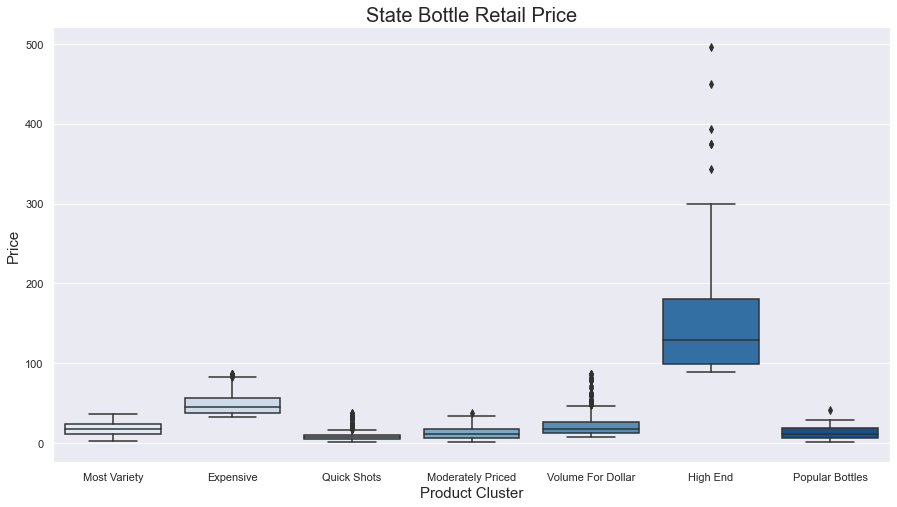

In [81]:
box('Bottle_Retail','Price',title='State Bottle Retail Price')

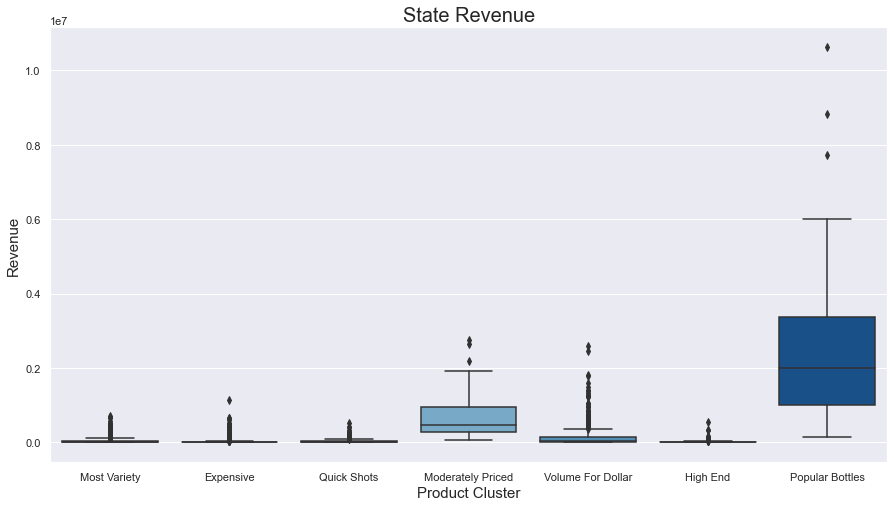

In [82]:

box('revenue','Revenue',title='State Revenue')

In [104]:

# box('Bottles_Sold','Bottles Sold',title='State Bottles Sold')

In [105]:
# box('price_per_ml','price per ml') #leave this out

In [87]:
# box('price_per_ml','price per ml') #leave this out